In [3]:
'''
Plot log(ab) vs. r  (linlog) to see in some cases the exp. That


-S(f) for f a probability distribution. Compute a power-law and then a exp. Then tune a mixed f (powe-law/exp).

'''

'\nPlot log(ab) vs. r  (linlog) to see in some cases the exp. That\n\n\n-S(f) for f a probability distribution. Compute a power-law and then a exp. Then tune a mixed f (powe-law/exp).\n\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
from matplotlib import animation
import random

In [5]:
#Read the index dictionary
#Revert the index 
index_name = 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        

from os import listdir
from os.path import isfile, join
import os
WD = os.getcwd()
mypath = WD + '/data'
file_output = WD + '/'+ 'seqs_index.dict'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}


#a = onlyfiles[0]
#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = WD + '/data/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
    
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)
temps = [30,43]

step=36 for t=30
step=28 for t=30
step=34 for t=43
step=46 for t=43
step=58 for t=30
step=22 for t=30
step=16 for t=43
step=40 for t=30
step=42 for t=43
step=18 for t=30
step=12 for t=43
step=44 for t=30
step=40 for t=43
step=44 for t=43
step=58 for t=43
step=22 for t=43
step=4 for t=30
step=38 for t=30
step=56 for t=43
step=12 for t=30
step=42 for t=30
step=30 for t=30
step=34 for t=30
step=14 for t=43
step=38 for t=43
step=30 for t=43
step=32 for t=43
step=60 for t=43
step=16 for t=30
step=14 for t=30
step=26 for t=30
step=26 for t=43
step=46 for t=30
step=50 for t=43
step=48 for t=43
step=10 for t=43
step=6 for t=30
step=54 for t=30
step=8 for t=43
step=2 for t=43
step=2 for t=30
step=54 for t=43
step=4 for t=43
step=52 for t=30
step=52 for t=43
step=56 for t=30
step=48 for t=30
step=1 for t=43
step=20 for t=43
step=20 for t=30
step=32 for t=30
step=28 for t=43
step=36 for t=43
step=6 for t=43
step=50 for t=30
step=60 for t=30
step=10 for t=30
step=25 for t=30
step=23 for t=30
step=

In [6]:
temps = [30,43]
r_max = 8000

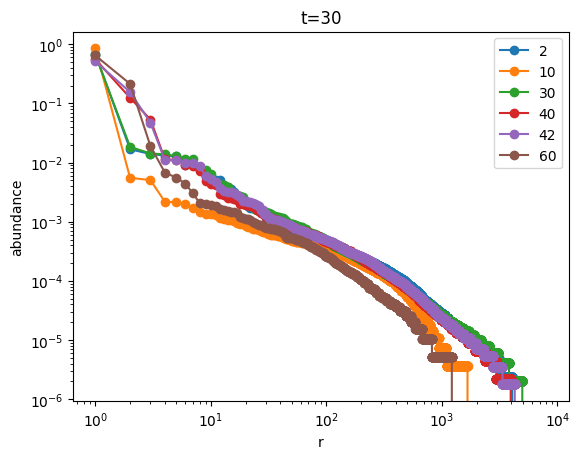

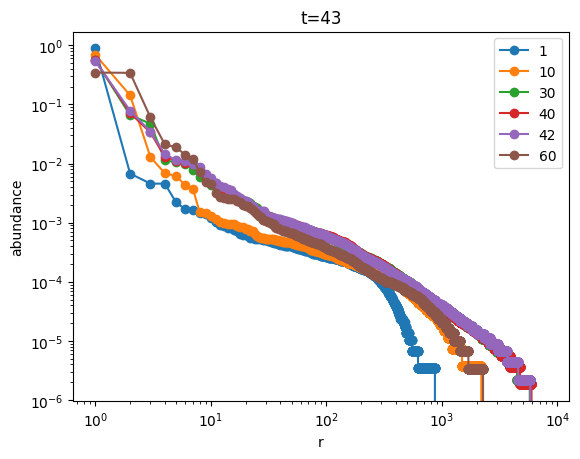

In [7]:
for t in temps:

    df_t = df[t]
    #df_t = df_t.sort_index()

    L = list(df_t.columns)
    L.sort()
    n = len(L)
    

    abundances = {i: [] for i in L}
    #abundances_fixrank = np.zeros((n, r_max))

    for i,step in enumerate(L):        

        vlist = df_t[step].to_list()[:r_max]
        #print(vlist)
        vlist.sort(reverse=True)
        vector = np.array(vlist)
        # Normalize by 1
        vector = vector / vector.sum()
        #print(vector.sum())

        abundances[step]= vector
    
    x = [1+i for i in range(r_max)]
    plt.figure()
    for i,step in enumerate(L):
        if step in [L[0], 10, 40,42,30, 60]:
            plt.plot(x, abundances[step], 'o-', label=f'{L[i]}')
            #plt.scatter(x, abundances[i] , s=10)

            plt.yscale('log')
            plt.xscale('log')
            plt.ylabel('abundance')
            plt.xlabel('r')
            #plt.ylim(ymax=0.8, ymin=5*10**-7)
            plt.title(f't={t}')
            plt.legend()
            plt.savefig(f'./pics_results/abundances_linlog{t}.png')

In [52]:

with open('./array30.np', 'wb') as f:
    np.save(f, abundances[30])

In [41]:
# Select step 42 or 40, for r>=1000

t=43
df_t = df[t]
L = list(df_t.columns)
L.sort()

r_min = 2000
r_max = 4000

list_steps = [40,42, 30, 32, 34, 36]
for i,step in enumerate(L):
    if step == list_steps[0]:
        break
print(step)
y_aux = df_t[step].to_numpy()
y_aux = y_aux[r_min:r_max]
y = y_aux


for is_step in list_steps[1:]:
    
    for i,step in enumerate(L):
        if step == is_step:
            break
    print(step)
    y_aux = df_t[step].to_numpy()
    y_aux = y_aux[r_min:r_max]
    y = y+y_aux

y = y/len(list_steps)
y = y/y.sum()
y = np.log(y)
x = np.arange(r_min, r_max)

40
42
30
32
34
36


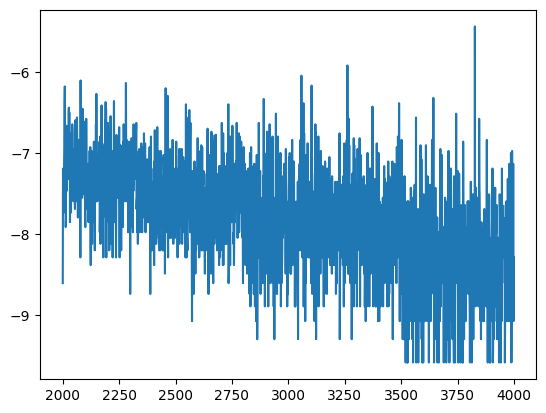

In [42]:
plt.plot(x,y)

In [43]:
m,b = np.polyfit(x, y, 1)

In [47]:
-1.0/m

1645.7606078109036